In [3]:
from keras.datasets import mnist, fashion_mnist, cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

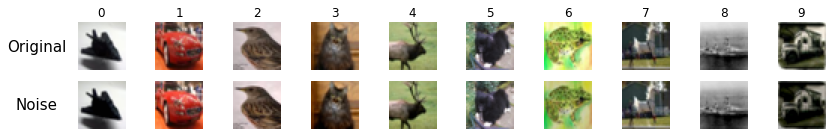

In [125]:
(x_train, y_train), (_, _) = cifar10.load_data()

# x_train = x_train.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
# x_train = x_train.astype('float32')/255.0

num_idx = [np.where(y_train == i)[0][i] for i in range(10)]

y_train = y_train[num_idx]
x_train = x_train[num_idx]

fig, axs = plt.subplots(2, 10, figsize=(12, 2))

axs.flatten()

for i in range(10):
    axs[0, i].imshow(x_train[i], cmap='gray_r')
    axs[0, i].set_title(y_train[i][0])    
    axs[0, i].axis('off')

    if i == 0:
        axs[0, i].text(-0.85, 0.5, 'Original', fontsize=10 + 5, va='center', ha='center', 
                     transform=axs[0, i].transAxes, rotation=0)


datagen = ImageDataGenerator(
    # rotation_range=90
    # horizontal_flip=True,
    # vertical_flip=True,
    # zoom_range=0.6,
    # width_shift_range=0.5,
    # height_shift_range=0.5,
    brightness_range=[0.7,1.3],
    channel_shift_range=20,
)

augmented = datagen.flow(x_train, 
                         shuffle=False)

for i in range(10):
    batch = augmented.next().astype('float32') / 255.0
    axs[1, i].imshow(batch[i])
    axs[1, i].axis('off')

    if i == 0:
        axs[1, i].text(-0.85, 0.5, 'Noise', fontsize=10 + 5, va='center', ha='center', 
                     transform=axs[1, i].transAxes, rotation=0)

# plt.suptitle('', fontsize=20)
plt.tight_layout()
plt.savefig('noise-augmentation', bbox_inches='tight')
plt.show();